# Credit Risk Analysis

## 1. Problem Statement

<p>Credit risk is associated with the possibility of a client failing to meet contractual obligations, such as mortgages, credit card debts, and other types of loans.</p>

## 2. Data Gathering

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../Data/loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Finding duplicate values
df[df.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## 3. EDA

<ol>
    <li>Missing value & outlier.</li>
    <li>Datatype.</li>
    <li>Distribution: balanced , imblanced, skewed.</li>
    <li>Correlation.</li>
</ol>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some missing values present and data type of some features is 'Object'.

In [5]:
# Total number of missing values present in each feature.
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Percentage of missing values in each feature towards in the whole data set.
df.isna().sum() / len(df) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
# Same as above
df.isna().sum() / df.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
null_percent_df = pd.DataFrame(df.isna().sum() / df.shape[0] * 100)
null_percent_df

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


### Imputation : Handling missing values

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [10]:
# This only considers the features which data type has numeric values
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
v = df['Gender'].mode()[0]
v
# 'Male' value replaced all the null values in Gender feature

'Male'

In [12]:
# This consider all features
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [13]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [14]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [15]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [16]:
# Mean is preferred because it gives optimal value
# Mode can give the highest value if that's the maximum count
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [17]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [18]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

### Changing Data Type

In [19]:
df['Gender'].replace({"Male" : 1, "Female" : 0}, inplace = True)

In [20]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df['Married'].replace({"Yes" : 1, "No" : 0}, inplace = True)

In [22]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

We need to perform Label Encoding on 'Dependents' feature

In [23]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
df['Education'].replace({"Graduate" : 1, "Not Graduate" : 0}, inplace = True)

In [25]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Self_Employed'].replace({"Yes" : 1, "No" : 0}, inplace = True)

In [27]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
df['Loan_Status'].replace({"Y" : 1, "N" : 0}, inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [30]:
df.isna().sum() / len(df) * 100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
df['Dependents'] = le.fit_transform(df['Dependents'])

In [34]:
df['Property_Area'] = le.fit_transform(df['Property_Area'])

### Retrieving classes after label encoding

In [35]:
le.classes_

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [36]:
le.transform(le.classes_)

array([0, 1, 2])

In [37]:
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
le_dict

{'Rural': 0, 'Semiurban': 1, 'Urban': 2}

All features are in numeric data type

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(2), int64(6), object(1)
memory usage: 57.7+ KB


In [39]:
import seaborn as sns

<AxesSubplot: >

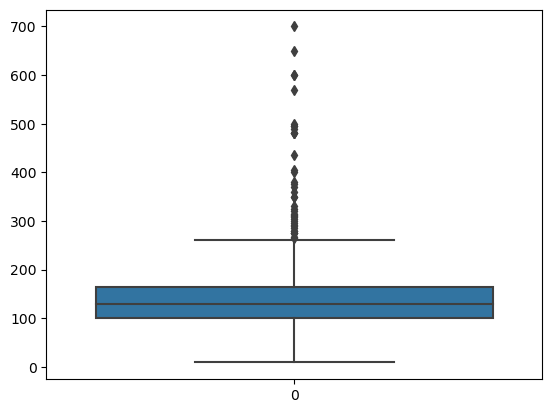

In [40]:
# To detect boxplot
sns.boxplot(df['LoanAmount'])

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: >

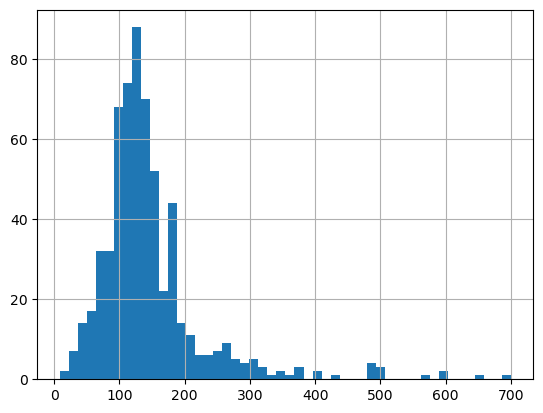

In [42]:
# Histogram
# Right Skewed Data
df['LoanAmount'].hist(bins = 50)

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

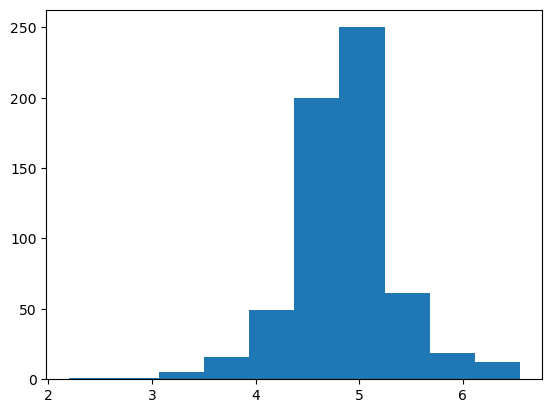

In [43]:
# Power Transform
# To remove the skewness and get Normal Distribution
plt.hist(np.log(df['LoanAmount']))

In [44]:
df['log_LoanAmount'] = np.log(df['LoanAmount'])

<AxesSubplot: >

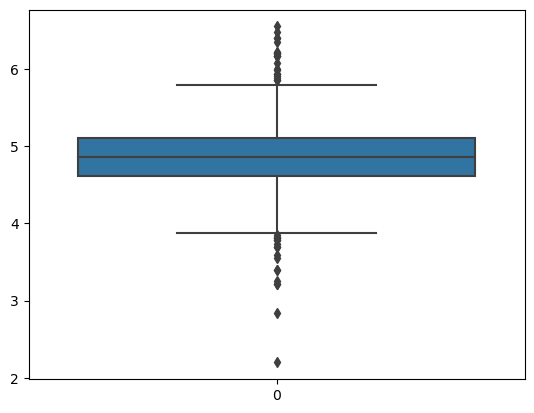

In [45]:
sns.boxplot(df['log_LoanAmount'])

C:\Users\Sanket\AppData\Local\Temp\ipykernel_18496\710699110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_LoanAmount'], kde = True)


<AxesSubplot: xlabel='log_LoanAmount', ylabel='Density'>

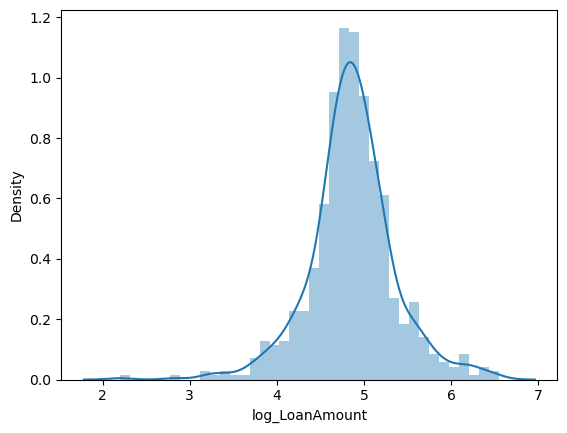

In [46]:
sns.distplot(df['log_LoanAmount'], kde = True)

In [47]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount'],
      dtype='object')

In [48]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot: >

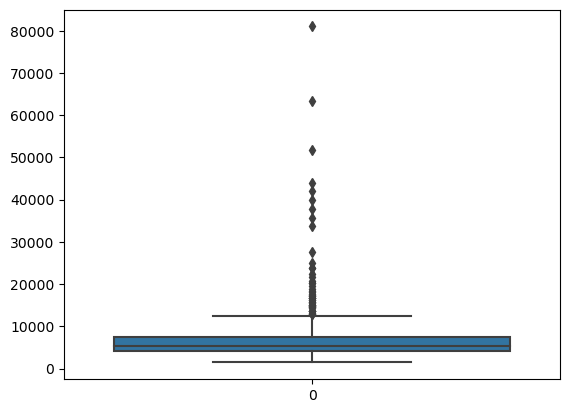

In [49]:
sns.boxplot(df['TotalIncome'])

<AxesSubplot: >

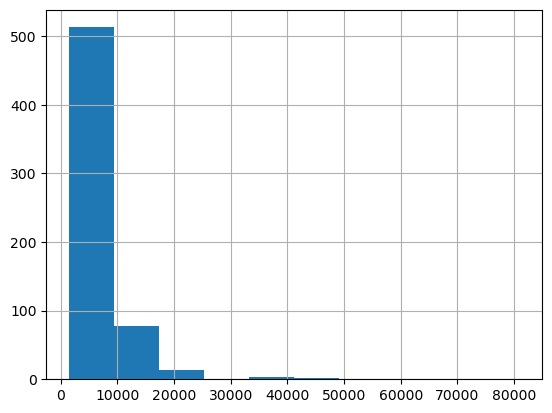

In [50]:
df['TotalIncome'].hist()

In [51]:
df['log_TotalIncome'] = np.log(df['TotalIncome'])

In [52]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,TotalIncome,log_TotalIncome
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


## Feature Selection

In [53]:
df.drop(columns=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome'], axis = 1, inplace = True)

In [54]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount', 'log_TotalIncome'],
      dtype='object')

In [55]:
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 
              'Property_Area', 'log_LoanAmount', 'log_TotalIncome', 'Loan_Status']]

In [56]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']
X.shape

(614, 10)

In [57]:
y.shape

(614,)

## Splitting the dataset

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35, stratify = y)

## Training the model and different algorithms

## 1. Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
model

C:\Users\Sanket\anaconda3\envs\xgboost\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred_logreg = model.predict(X_test)
y_pred_logreg[0 : 10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [63]:
y_test[0 : 10]

C:\Users\Sanket\AppData\Local\Temp\ipykernel_18496\1565033047.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[0 : 10]


445    1
270    1
568    0
115    1
502    1
529    1
118    0
408    0
286    0
329    1
Name: Loan_Status, dtype: int64

## Evaluating the model

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score

In [65]:
accuracy_score(y_test, y_pred_logreg)

0.7967479674796748

In [66]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.78      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.80      0.77       123



In [67]:
confusion_matrix(y_test, y_pred_logreg)

array([[15, 23],
       [ 2, 83]], dtype=int64)

### Logistic Regression with Random State

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

In [69]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_logreg = model.predict(X_test)
accuracy_score(y_test, y_pred_logreg)

C:\Users\Sanket\anaconda3\envs\xgboost\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8130081300813008

In [70]:
precision_logreg = precision_score(y_test, y_pred_logreg)
precision_logreg

0.7924528301886793

## 2. Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
tree_clf = DecisionTreeClassifier()

In [73]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred_tree_clf = tree_clf.predict(X_test)

In [75]:
y_pred_tree_clf[0 : 10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [76]:
y_test[0 : 10]

C:\Users\Sanket\AppData\Local\Temp\ipykernel_18496\1565033047.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[0 : 10]


507    0
493    1
434    1
125    1
294    1
429    1
214    1
301    1
395    1
595    1
Name: Loan_Status, dtype: int64

In [77]:
accuracy_score(y_test, y_pred_tree_clf)

0.7073170731707317

In [78]:
precision_tree = precision_score(y_test, y_pred_tree_clf)
precision_tree

0.810126582278481

## GridSearchCV and RandomSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [80]:
hyperparameter = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : np.arange(2, 15),
    'min_samples_split' : np.arange(2, 10),
    'min_samples_leaf' : np.arange(2, 10)
}

In [81]:
%%time
grid_tree_clf = GridSearchCV(tree_clf, hyperparameter, cv = 10, n_jobs = -1)
grid_tree_clf.fit(X_train, y_train)

CPU times: total: 4.2 s
Wall time: 16 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [82]:
hyperparameter = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : np.arange(2, 15),
    'min_samples_split' : np.arange(2, 10),
    'min_samples_leaf' : np.arange(2, 10)
}

In [83]:
%%time
grid_tree_clf = RandomizedSearchCV(tree_clf, hyperparameter, cv = 10, n_jobs = -1)
grid_tree_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 129 ms


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [84]:
grid_tree_clf.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'criterion': 'gini'}

In [85]:
y_pred_grid_tree_clf = grid_tree_clf.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred_grid_tree_clf)

0.8211382113821138

In [87]:
precision_tree_hyper = precision_score(y_test, y_pred_grid_tree_clf)
precision_tree_hyper

0.8

## 3. XGBoost

In [88]:
from xgboost import XGBClassifier, XGBRFClassifier

In [89]:
help(XGBRFClassifier)

Help on class XGBRFClassifier in module xgboost.sklearn:

class XGBRFClassifier(XGBClassifier)
 |  XGBRFClassifier(*, learning_rate: float = 1.0, subsample: float = 0.8, colsample_bynode: float = 0.8, reg_lambda: float = 1e-05, **kwargs: Any)
 |  
 |  scikit-learn API for XGBoost random forest classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of trees in random forest to fit.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learning_rate : Optional[float]
 |          Boosting learning rate (xgb's "eta")
 |      ver

In [90]:
%%time
xgb = XGBClassifier(n_estimators = 120)
xgb.fit(X_train, y_train)

CPU times: total: 250 ms
Wall time: 64 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
y_pred_xgb = xgb.predict(X_test)
precision_xgb = precision_score(y_test, y_pred_xgb)
precision_xgb

0.8333333333333334

## Model Evaluation based on all 3 algorithms

In [92]:
print(f"Logistic Regression: {precision_logreg}")
print(f"Decision Tree: {precision_tree}")
print(f"Decision Tree Hyper Parameter: {precision_tree_hyper}")
print(f"XGboost: {precision_xgb}")

Logistic Regression: 0.7924528301886793
Decision Tree: 0.810126582278481
Decision Tree Hyper Parameter: 0.8
XGboost: 0.8333333333333334


In [93]:
print(f"Logistic Regression: {precision_logreg * 100}")
print(f"Decision Tree: {precision_tree * 100}")
print(f"Decision Tree Hyper Parameter: {precision_tree_hyper * 100}")
print(f"XGboost: {precision_xgb * 100}")

Logistic Regression: 79.24528301886792
Decision Tree: 81.0126582278481
Decision Tree Hyper Parameter: 80.0
XGboost: 83.33333333333334


## Creating Pickle File

In [94]:
import pickle

In [95]:
model = pickle.dump(xgb, open('../Model/model.pkl', 'wb'))